In [14]:
import pandas as pd
import numpy as np


In [2]:
from sklearn import datasets ## imports datasets from scikit-learn

In [3]:
data = datasets.load_boston() ## loads Boston dataset from datasets library 


go to http://scikit-learn.org/stable/datasets/index.html#boston-house-prices-dataset  get details
    


In [6]:
data.keys()

['data', 'feature_names', 'DESCR', 'target']

In [10]:
type(data.data)

numpy.ndarray

In [12]:
print(data.data.shape)

(506, 13)


In [8]:
data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='|S7')

In [13]:
data.target.shape

(506,)

In [17]:
data_frame = pd.DataFrame(data.data,columns=data.feature_names)

In [18]:
target = pd.DataFrame(data.target,columns=['prices'])

In [32]:
intercept = pd.DataFrame([1]*506,columns=['intercept'])

In [33]:
whole_data = pd.concat([intercept,data_frame,target],axis=1)

In [34]:
whole_data.head()

,intercept,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,prices
0,1,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,1,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,1,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,1,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## fit a linear regression model.

We need to choose variables that we think we’ll be good predictors for the dependent variable — that can be done by checking the correlation(s) between variables, by plotting the data and searching visually for relationship, by conducting preliminary research on what variables are good predictors of y etc

## Simple Linear Regession 
Fit a regression between one independent and a dependent variable

In [23]:
from sklearn import linear_model

In [48]:
X = whole_data[['RM']]
y = target['prices']

In [49]:
lm = linear_model.LinearRegression()
model = lm.fit(X,y)

In [50]:
predictions = lm.predict(X)
print(predictions)[0:5]

[25.17574577 23.77402099 30.72803225 29.02593787 30.38215211]


In [51]:
lm.score(X,y)

0.4835254559913343

In [52]:
lm.coef_

array([9.10210898])

In [53]:
lm.intercept_

-34.67062077643857

## with intercept 

In [39]:
X = whole_data[['intercept','RM']]
y = target['prices']

In [40]:
lm = linear_model.LinearRegression()
model = lm.fit(X,y)

In [41]:
predictions = lm.predict(X)
print(predictions)[0:5]

[25.17574577 23.77402099 30.72803225 29.02593787 30.38215211]


In [42]:
lm.score(X,y)

0.4835254559913343

In [43]:
lm.coef_

array([0.        , 9.10210898])

In [44]:
lm.intercept_

-34.670620776438554

## Multivariate Linear Regression

In [25]:
X = data_frame
y = target['prices']

In [26]:
lm = linear_model.LinearRegression()
model = lm.fit(X,y)

In [27]:
predictions = lm.predict(X)
print(predictions)[0:5]

[30.00821269 25.0298606  30.5702317  28.60814055 27.94288232]


In [28]:
lm.score(X,y)

0.7406077428649427

In [29]:
lm.coef_

array([-1.07170557e-01,  4.63952195e-02,  2.08602395e-02,  2.68856140e+00,
       -1.77957587e+01,  3.80475246e+00,  7.51061703e-04, -1.47575880e+00,
        3.05655038e-01, -1.23293463e-02, -9.53463555e-01,  9.39251272e-03,
       -5.25466633e-01])

In [30]:
lm.intercept_

36.49110328036191

## with splits

In [57]:
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [58]:
# Load the Diabetes Housing dataset
columns = "age sex bmi map tc ldl hdl tch ltg glu".split() # Declare the columns names
diabetes = datasets.load_diabetes() # Call the diabetes dataset from sklearn
df = pd.DataFrame(diabetes.data, columns=columns) # load the dataset as a pandas data frame
y = diabetes.target # define the target variable (dependent variable) as y


In [59]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

(353, 10) (353,)
(89, 10) (89,)


In [60]:
# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [61]:
predictions[0:5]

array([114.73255094, 179.1612664 , 209.33041925, 238.80332957,
       105.69712561])

Text(0,0.5,'Predictions')

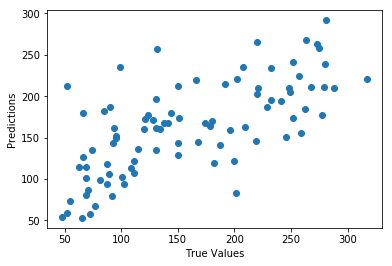

In [63]:
## The line / model
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [64]:
print "Score:", model.score(X_test, y_test)

Score: 0.4597048422691369


In [65]:
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics


/home/abhay/.virtualenvs/Data_Science/local/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [66]:
# Perform 6-fold cross validation
scores = cross_val_score(model, df, y, cv=6)
print "Cross-validated scores:", scores

Cross-validated scores: [0.4554861  0.46138572 0.40094084 0.55220736 0.43942775 0.56923406]


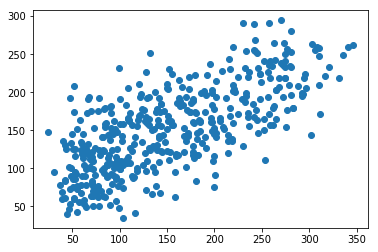

In [73]:
predictions = cross_val_predict(model, df, y, cv=10)
plt.scatter(y, predictions)


In [74]:
accuracy = metrics.r2_score(y, predictions)
print "Cross-Predicted Accuracy:", accuracy

Cross-Predicted Accuracy: 0.494251180618835


## Diabetes Dataset

In [13]:
from sklearn import datasets ## imports datasets from scikit-learn
import pandas as pd
import numpy as np

In [14]:
data = datasets.load_diabetes()

In [15]:
data.keys()

['data', 'DESCR', 'feature_names', 'target']

In [16]:
type(data.data)

numpy.ndarray

In [17]:
data.data.shape

(442, 10)

In [18]:
type(data.feature_names)

list

In [19]:
len(data.feature_names)

10

In [20]:
train_data = pd.DataFrame(data.data,columns=data.feature_names)

In [22]:
train_data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [23]:
type(data.target)

numpy.ndarray

In [24]:
data.target.shape

(442,)

## Simple Linear Regression

In [25]:
from sklearn import linear_model

In [36]:
X = train_data
y = data.target

In [37]:
lm = linear_model.LinearRegression()
model = lm.fit(X,y)

In [38]:
predictions = lm.predict(X)
print(predictions)[0:5]

[206.11706979  68.07234761 176.88406035 166.91796559 128.45984241]


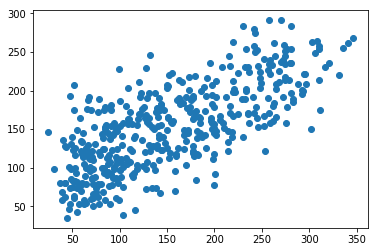

In [39]:
import matplotlib.pyplot as plt
plt.scatter(y, predictions)

In [40]:
model.coef_

array([ -10.01219782, -239.81908937,  519.83978679,  324.39042769,
       -792.18416163,  476.74583782,  101.04457032,  177.06417623,
        751.27932109,   67.62538639])

In [41]:
model.intercept_

152.1334841628965